Applying linear regression to the bike sharing data set.

Steps:<br />
* Read in data
*  ...

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.mlab as mlab
#import matplotlib.patches as mpatches
#from matplotlib.pyplot import figure
#from numpy import average
import datetime as dt
from datetime import datetime
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats.stats import pearsonr

# called to counteract dark-mode Jupyter from swallowing axes &c.
plt.style.use('seaborn-whitegrid')

In [2]:
# Import the modified data tracking hourly bike rentals
hourly_core = pd.read_csv('data/mod_data/hour_mod.csv')

In [3]:
hourly_core.columns

Index(['date_time', 'instant', 'date_day', 'season', 'year', 'month', 'hour',
       'is_holiday', 'weekday', 'is_workday', 'weather', 'temp', 'temp_feel',
       'humidity', 'windspeed', 'casual', 'registered', 'total_riders',
       'hour_time', 'season_name', 'weekday_name', 'weather_desc', 'daytime',
       'daytime_code', 'cold', 'hot', 'muggy'],
      dtype='object')

In [4]:
hourly_core.head().T

,0,1,2,3,4
date_time,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
instant,1,2,3,4,5
date_day,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01
season,1,1,1,1,1
year,2011,2011,2011,2011,2011
month,1,1,1,1,1
hour,0,1,2,3,4
is_holiday,0,0,0,0,0
weekday,6,6,6,6,6
is_workday,0,0,0,0,0


In [5]:
hourly_core.dtypes

date_time        object
instant           int64
date_day         object
season            int64
year              int64
month             int64
hour              int64
is_holiday        int64
weekday           int64
is_workday        int64
weather           int64
temp            float64
temp_feel       float64
humidity        float64
windspeed       float64
casual            int64
registered        int64
total_riders      int64
hour_time        object
season_name      object
weekday_name     object
weather_desc     object
daytime          object
daytime_code      int64
cold              int64
hot               int64
muggy             int64
dtype: object

In [6]:
hourly_core['date_day'] = pd.to_datetime(hourly_core['date_day'], format='%Y-%m-%d')
hourly_core['day'] = hourly_core.date_day.dt.day

In [7]:
# Convert to 'category' data type

hourly_core['season_name']=hourly_core['season_name'].astype('category')
hourly_core['weather_desc']=hourly_core['weather_desc'].astype('category')
hourly_core['month']=hourly_core['month'].astype('category')
hourly_core['weekday_name']=hourly_core['weekday_name'].astype('category')
x={1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}
hourly_core['month']=hourly_core['month'].map(x)
hourly_core['year']=hourly_core['year'].astype('category')

In [8]:
hourly_core.columns

Index(['date_time', 'instant', 'date_day', 'season', 'year', 'month', 'hour',
       'is_holiday', 'weekday', 'is_workday', 'weather', 'temp', 'temp_feel',
       'humidity', 'windspeed', 'casual', 'registered', 'total_riders',
       'hour_time', 'season_name', 'weekday_name', 'weather_desc', 'daytime',
       'daytime_code', 'cold', 'hot', 'muggy', 'day'],
      dtype='object')

In [9]:
hourly_core.dtypes

date_time               object
instant                  int64
date_day        datetime64[ns]
season                   int64
year                  category
month                 category
hour                     int64
is_holiday               int64
weekday                  int64
is_workday               int64
weather                  int64
temp                   float64
temp_feel              float64
humidity               float64
windspeed              float64
casual                   int64
registered               int64
total_riders             int64
hour_time               object
season_name           category
weekday_name          category
weather_desc          category
daytime                 object
daytime_code             int64
cold                     int64
hot                      int64
muggy                    int64
day                      int64
dtype: object

In [10]:
hourly_core = hourly_core.drop(columns=['date_time', 'instant', 'date_day', 'season', 'weekday', 'weather', 
                    'hour_time', 'daytime', 'daytime_code', 'cold', 'hot', 'muggy'])

In [11]:
hourly_core.head(5)

,year,month,hour,is_holiday,is_workday,temp,temp_feel,humidity,windspeed,casual,registered,total_riders,season_name,weekday_name,weather_desc,day
0,2011,jan,0,0,0,3.28,3.0014,81.0,0.0,3,13,16,winter,saturday,clear,1
1,2011,jan,1,0,0,2.34,1.9982,80.0,0.0,8,32,40,winter,saturday,clear,1
2,2011,jan,2,0,0,2.34,1.9982,80.0,0.0,5,27,32,winter,saturday,clear,1
3,2011,jan,3,0,0,3.28,3.0014,75.0,0.0,3,10,13,winter,saturday,clear,1
4,2011,jan,4,0,0,3.28,3.0014,75.0,0.0,0,1,1,winter,saturday,clear,1


<hr>

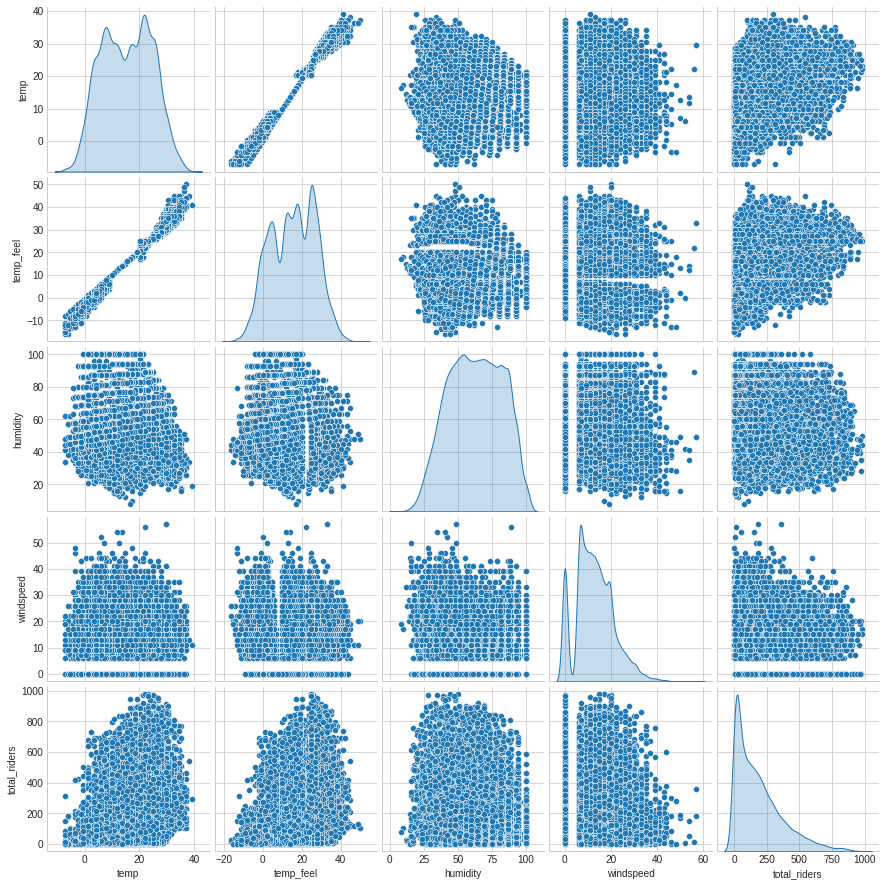

In [12]:
# Create a new dataframe of only the numeric variables

bike_nums = hourly_core[['temp', 'temp_feel', 'humidity', 'windspeed', 'total_riders']]

sb.pairplot(bike_nums, diag_kind='kde')
plt.show()

In [13]:
bike_nums.head()

,temp,temp_feel,humidity,windspeed,total_riders
0,3.28,3.0014,81.0,0.0,16
1,2.34,1.9982,80.0,0.0,40
2,2.34,1.9982,80.0,0.0,32
3,3.28,3.0014,75.0,0.0,13
4,3.28,3.0014,75.0,0.0,1


In [14]:
hourly_core.columns

Index(['year', 'month', 'hour', 'is_holiday', 'is_workday', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'casual', 'registered',
       'total_riders', 'season_name', 'weekday_name', 'weather_desc', 'day'],
      dtype='object')

<hr>

Further steps:<br />
(1) Encode categorical variables with dummy variables : <br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ordinal: year, month, hour<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;nominal: season_name, weekday_name, weather_desc<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* weekday: 0-monday, 1-tuesday, 2-wednesday, 3-thursday, 4-friday, 5-saturday, 6-sunday<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* season: 1-winter, 2-spring, 3-summer, 4-autumn<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* weather: 1-clear, 2-foggy, 3-inclement, 4-crap<br />
(2) split test and training data<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(Q: do I need to shuffle the data before splitting?)<br />
(3) normalise / scale the data of the training set<br />
(4) select features (with VIF) or reduce dimensionality (Principal Component Analysis [PCA])<br />
(5) fit model<br />
(6) evaluate model<br />

---

## Encode variables

In [15]:
hourly_dummies = hourly_core.copy()

In [16]:
# Encode nominal variables
hourly_dummies = pd.get_dummies(hourly_dummies, prefix=['weather'], columns=['weather_desc'], drop_first=True)
hourly_dummies = pd.get_dummies(hourly_dummies, prefix=['season'], columns=['season_name'], drop_first=True)
hourly_dummies = pd.get_dummies(hourly_dummies, prefix=['day'], columns=['weekday_name'], drop_first=True)


In [17]:
hourly_dummies.month.unique()

['jan', 'feb', 'mar', 'apr', 'may', ..., 'aug', 'sep', 'oct', 'nov', 'dec']
Length: 12
Categories (12, object): ['jan', 'feb', 'mar', 'apr', ..., 'sep', 'oct', 'nov', 'dec']

In [18]:
# Encode ordinal variables
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
              'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
hourly_dummies['month'] = hourly_dummies.month.map(month_dict)
hourly_dummies['year'] = hourly_dummies.year.map({2011:1, 2012:2})

In [19]:
hourly_dummies.head(5)

,year,month,hour,is_holiday,is_workday,temp,temp_feel,humidity,windspeed,casual,...,weather_inclement,season_spring,season_summer,season_winter,day_monday,day_saturday,day_sunday,day_thursday,day_tuesday,day_wednesday
0,1,1,0,0,0,3.28,3.0014,81.0,0.0,3,...,0,0,0,1,0,1,0,0,0,0
1,1,1,1,0,0,2.34,1.9982,80.0,0.0,8,...,0,0,0,1,0,1,0,0,0,0
2,1,1,2,0,0,2.34,1.9982,80.0,0.0,5,...,0,0,0,1,0,1,0,0,0,0
3,1,1,3,0,0,3.28,3.0014,75.0,0.0,3,...,0,0,0,1,0,1,0,0,0,0
4,1,1,4,0,0,3.28,3.0014,75.0,0.0,0,...,0,0,0,1,0,1,0,0,0,0


## Split test and training data

Q: do I need to shuffle the data before splitting?)


In [20]:
hourly_dummies.shape

(17379, 25)

In [21]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(hourly_dummies, train_size = 0.70, test_size = 0.30, random_state = 42)

In [22]:
df_train.shape

(12165, 25)

In [23]:
df_test.shape

(5214, 25)

In [24]:
df_train.columns

Index(['year', 'month', 'hour', 'is_holiday', 'is_workday', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'casual', 'registered',
       'total_riders', 'day', 'weather_crap', 'weather_foggy',
       'weather_inclement', 'season_spring', 'season_summer', 'season_winter',
       'day_monday', 'day_saturday', 'day_sunday', 'day_thursday',
       'day_tuesday', 'day_wednesday'],
      dtype='object')

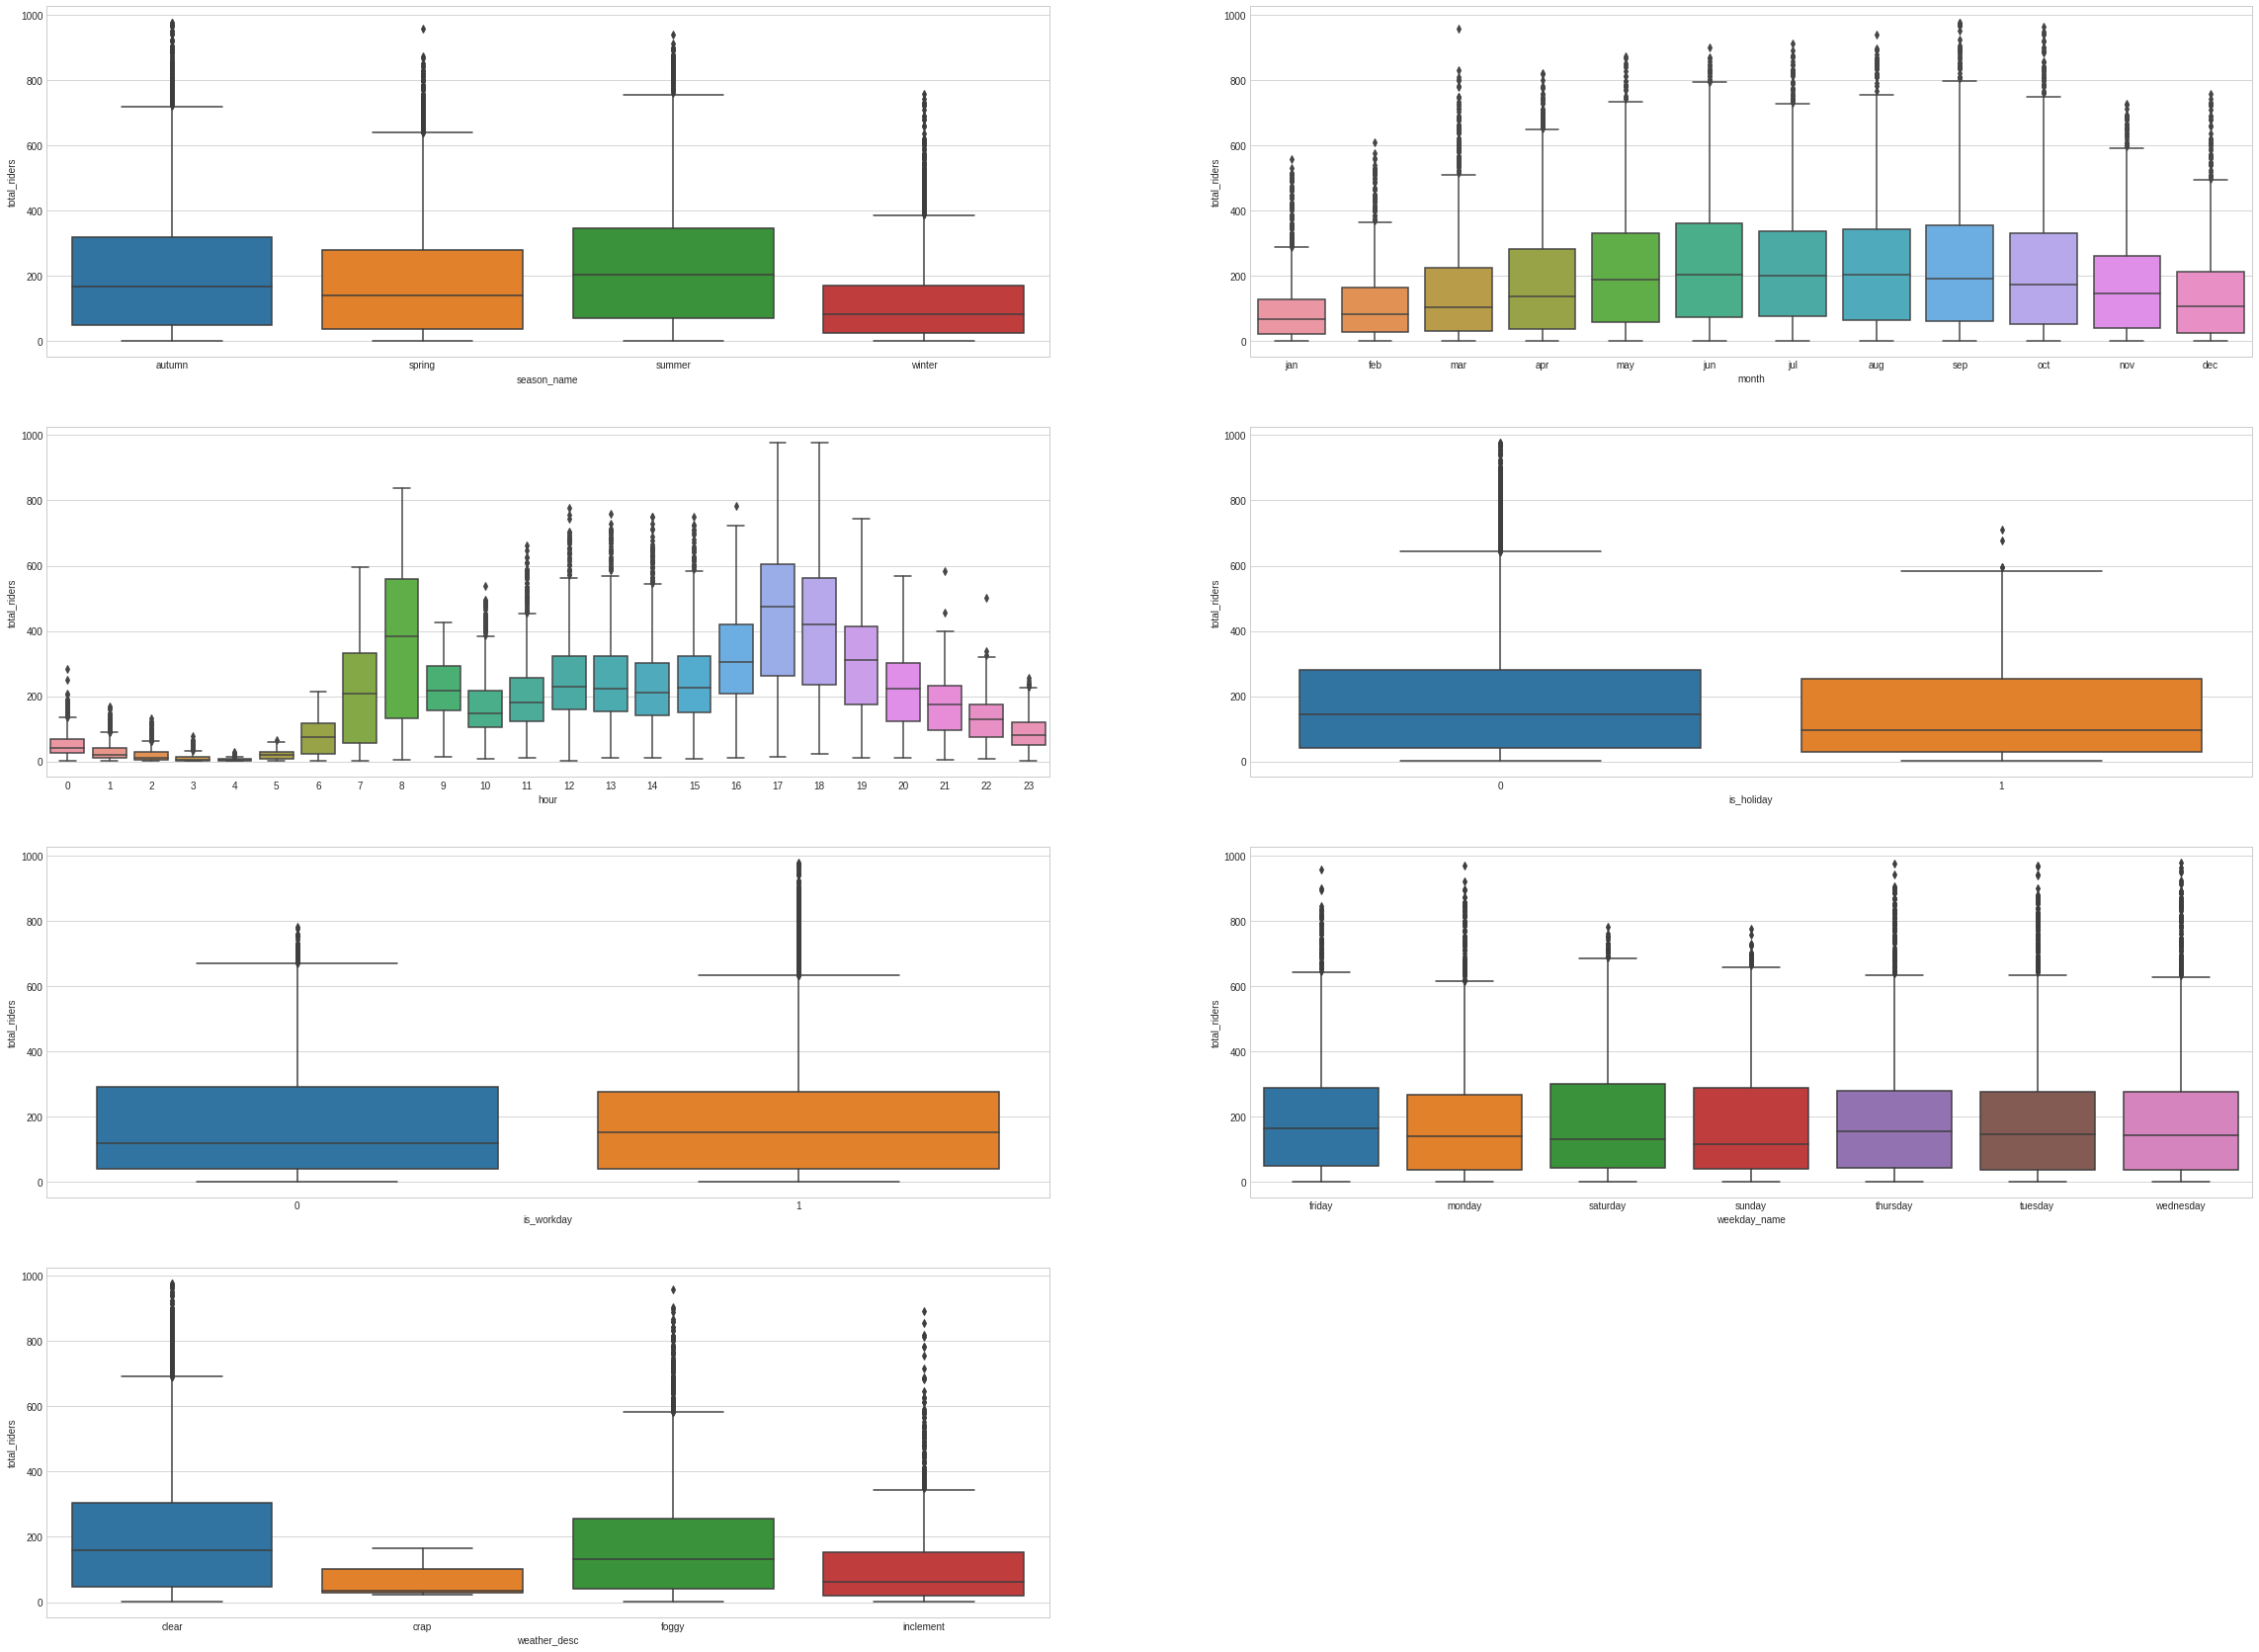

In [25]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(40, 30))
plt.subplot(4,2,1)
sb.boxplot(x = 'season_name', y = 'total_riders', data = hourly_core)
plt.subplot(4,2,2)
sb.boxplot(x = 'month', y = 'total_riders', data = hourly_core)
plt.subplot(4,2,3)
sb.boxplot(x = 'hour', y = 'total_riders', data = hourly_core)
plt.subplot(4,2,4)
sb.boxplot(x = 'is_holiday', y = 'total_riders', data = hourly_core)
plt.subplot(4,2,5)
sb.boxplot(x = 'is_workday', y = 'total_riders', data = hourly_core)
plt.subplot(4,2,6)
sb.boxplot(x = 'weekday_name', y = 'total_riders', data = hourly_core)
plt.subplot(4,2,7)
sb.boxplot(x = 'weather_desc', y = 'total_riders', data = hourly_core)
plt.show()

## Normalise / scale the data of the training set


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [27]:
numerical_vars = ['temp', 'temp_feel', 'humidity', 'windspeed', 'total_riders']

df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])



In [28]:
df_train.head()

,year,month,hour,is_holiday,is_workday,temp,temp_feel,humidity,windspeed,casual,...,weather_inclement,season_spring,season_summer,season_winter,day_monday,day_saturday,day_sunday,day_thursday,day_tuesday,day_wednesday
11229,2,4,2,0,1,0.489796,0.492283,0.369565,0.228047,1,...,0,1,0,0,0,0,0,0,0,1
6334,1,9,12,0,1,0.673469,0.646223,0.771739,0.193018,48,...,0,0,0,0,1,0,0,0,0,0
11060,2,4,0,0,1,0.326531,0.307677,0.304348,0.491243,8,...,0,1,0,0,0,0,0,0,0,1
12346,2,6,15,0,0,0.693878,0.646223,0.282609,0.000000,236,...,0,0,1,0,0,0,1,0,0,0
15437,2,10,10,0,1,0.551020,0.538485,0.478261,0.350888,27,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# Divide into x and y for model learning
y_train = df_train.pop('total_riders')
X_train = df_train

## Select features or reduce dimensionality

**Feature selection**
* VIF (Variance inflation factor)
* RFE (Recursive feature elimination)
* Correlation heatmap

**Dimensionality reduction**
* PCA (Principal component analysis)

(5) fit model<br />
(6) evaluate model<br />

### VIF (Variance inflation factor)

In [30]:
X_train_vif = X_train.copy()

In [31]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [32]:
X_train_vif.columns

Index(['year', 'month', 'hour', 'is_holiday', 'is_workday', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'casual', 'registered', 'day',
       'weather_crap', 'weather_foggy', 'weather_inclement', 'season_spring',
       'season_summer', 'season_winter', 'day_monday', 'day_saturday',
       'day_sunday', 'day_thursday', 'day_tuesday', 'day_wednesday'],
      dtype='object')

In [33]:
# Drop registered and casual because of link to dependent variable total_riders
X_train_vif = X_train_vif.drop(['casual', 'registered'], axis = 1)

In [34]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,78.94
6,temp_feel,75.55
4,is_workday,52.96
18,day_sunday,11.36
17,day_saturday,11.25
3,is_holiday,3.19
14,season_summer,2.66
15,season_winter,2.61
13,season_spring,2.55
1,month,1.84


In [35]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_vif)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [36]:
# Check the parameters obtained

lr1.params

const               -0.083307
year                 0.082487
month                0.003850
hour                 0.007332
is_holiday          -0.047950
is_workday          -0.008088
temp                 0.158477
temp_feel            0.258965
humidity            -0.203185
windspeed            0.018150
day                 -0.000190
weather_crap         0.054071
weather_foggy        0.009022
weather_inclement   -0.018311
season_spring       -0.014832
season_summer       -0.072372
season_winter       -0.018419
day_monday          -0.005880
day_saturday        -0.008593
day_sunday          -0.018676
day_thursday        -0.004572
day_tuesday         -0.001705
day_wednesday        0.000697
dtype: float64

In [37]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:           total_riders   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     388.5
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:10:03   Log-Likelihood:                 6223.1
No. Observations:               12165   AIC:                        -1.240e+04
Df Residuals:                   12143   BIC:                        -1.224e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0833      0.00

Drop temp because of high VIF

In [38]:
X_train_vif_2 = X_train_vif.drop(['temp'], axis = 1)

In [39]:
# Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_vif_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_2.values, i) for i in range(X_train_vif_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,is_workday,50.17
17,day_sunday,10.75
16,day_saturday,10.66
3,is_holiday,3.11
5,temp_feel,2.75
14,season_winter,2.58
13,season_summer,2.56
12,season_spring,2.55
1,month,1.83
15,day_monday,1.79


In [40]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_vif_2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [41]:
# Check the parameters obtained

lr2.params

const               -0.088760
year                 0.082474
month                0.003807
hour                 0.007339
is_holiday          -0.048363
is_workday          -0.009743
temp_feel            0.430356
humidity            -0.204585
windspeed            0.025818
day                 -0.000171
weather_crap         0.055270
weather_foggy        0.009355
weather_inclement   -0.017370
season_spring       -0.015521
season_summer       -0.069803
season_winter       -0.019798
day_monday          -0.006170
day_saturday        -0.010214
day_sunday          -0.020439
day_thursday        -0.004423
day_tuesday         -0.001676
day_wednesday        0.001091
dtype: float64

In [42]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:           total_riders   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     407.3
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:10:03   Log-Likelihood:                 6219.5
No. Observations:               12165   AIC:                        -1.240e+04
Df Residuals:                   12144   BIC:                        -1.224e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0888      0.00

is_workday has a high VIF.<br />
Is its high VIF caused by the presence of each day listed separately as a dummy variable?<br />
I'm dropping the individual day variables. We have seen that the number of total cyclists is comparatively stable throughout the week if we do not specifically look at registered and casual cyclists separate.

In [43]:
X_train_vif_3 = X_train_vif_2.drop(['day_monday', 'day_saturday', 'day_sunday', 'day_thursday',
       'day_tuesday', 'day_wednesday'], axis = 1)

In [44]:
# Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_vif_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_3.values, i) for i in range(X_train_vif_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp_feel,19.71
6,humidity,10.35
0,year,8.71
1,month,7.46
2,hour,4.22
8,day,4.07
7,windspeed,3.48
13,season_summer,3.41
4,is_workday,3.28
12,season_spring,2.93


In [45]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_vif_3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [46]:
# Check the parameters obtained

lr3.params

const               -0.103894
year                 0.082477
month                0.003817
hour                 0.007333
is_holiday          -0.037903
is_workday           0.003447
temp_feel            0.430244
humidity            -0.204972
windspeed            0.026038
day                 -0.000167
weather_crap         0.055162
weather_foggy        0.009501
weather_inclement   -0.016777
season_spring       -0.015670
season_summer       -0.069926
season_winter       -0.019950
dtype: float64

In [47]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:           total_riders   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     542.5
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:10:04   Log-Likelihood:                 6215.9
No. Observations:               12165   AIC:                        -1.240e+04
Df Residuals:                   12149   BIC:                        -1.228e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1039      0.01

I'm dropping day because of high p-value and what number of day it is in the month is not really a significant factor of people choosing to ride a bike.

In [48]:
X_train_vif_4 = X_train_vif_3.drop(['day'], axis = 1)

In [49]:
# Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_vif_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_4.values, i) for i in range(X_train_vif_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp_feel,19.51
6,humidity,10.12
0,year,8.65
1,month,7.42
2,hour,4.20
7,windspeed,3.46
12,season_summer,3.41
4,is_workday,3.27
11,season_spring,2.90
13,season_winter,2.34


In [50]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_vif_4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [51]:
# Check the parameters obtained

lr4.params

const               -0.106065
year                 0.082452
month                0.003814
hour                 0.007330
is_holiday          -0.037896
is_workday           0.003408
temp_feel            0.430019
humidity            -0.205244
windspeed            0.025888
weather_crap         0.054972
weather_foggy        0.009560
weather_inclement   -0.016711
season_spring       -0.015749
season_summer       -0.069942
season_winter       -0.020049
dtype: float64

In [52]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:           total_riders   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     581.2
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:10:05   Log-Likelihood:                 6215.2
No. Observations:               12165   AIC:                        -1.240e+04
Df Residuals:                   12150   BIC:                        -1.229e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1061      0.01

season_spring and season_winter have high p values, season_summer has a high t values.<br />
I can't drop temp because of a high VIF, because I'm certain apparent temperature affects the number of cyclists on the road.

In [53]:
X_train_vif_4 = X_train_vif_3.drop(['season_spring', 'season_summer', 'season_winter'], axis = 1)



In [54]:
# Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_vif_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_4.values, i) for i in range(X_train_vif_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,humidity,8.88
5,temp_feel,8.43
0,year,7.80
1,month,4.96
8,day,3.99
2,hour,3.84
4,is_workday,3.22
7,windspeed,3.21
10,weather_foggy,1.56
11,weather_inclement,1.35


In [55]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_vif_4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [56]:
# Check the parameters obtained

lr4.params

const               -0.114182
year                 0.084204
month                0.005430
hour                 0.007726
is_holiday          -0.029148
is_workday           0.004122
temp_feel            0.341353
humidity            -0.195149
windspeed            0.035173
day                 -0.000169
weather_crap         0.042173
weather_foggy        0.011267
weather_inclement   -0.017362
dtype: float64

In [57]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:           total_riders   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     642.9
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:10:05   Log-Likelihood:                 6087.1
No. Observations:               12165   AIC:                        -1.215e+04
Df Residuals:                   12152   BIC:                        -1.205e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1142      0.00

In [60]:
# drop day, as in day of the month
X_train_vif_5 = X_train_vif_4.drop(['day'], axis = 1)



In [61]:
# Check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_vif_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif_5.values, i) for i in range(X_train_vif_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,humidity,8.46
5,temp_feel,8.36
0,year,7.65
1,month,4.96
2,hour,3.80
4,is_workday,3.20
7,windspeed,3.16
9,weather_foggy,1.56
10,weather_inclement,1.35
3,is_holiday,1.09


In [62]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_vif_5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [63]:
# Check the parameters obtained

lr5.params

const               -0.116501
year                 0.084177
month                0.005432
hour                 0.007722
is_holiday          -0.029141
is_workday           0.004081
temp_feel            0.341236
humidity            -0.195419
windspeed            0.035017
weather_crap         0.041992
weather_foggy        0.011321
weather_inclement   -0.017297
dtype: float64

In [64]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:           total_riders   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     701.2
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:14:16   Log-Likelihood:                 6086.4
No. Observations:               12165   AIC:                        -1.215e+04
Df Residuals:                   12153   BIC:                        -1.206e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1165      0.00

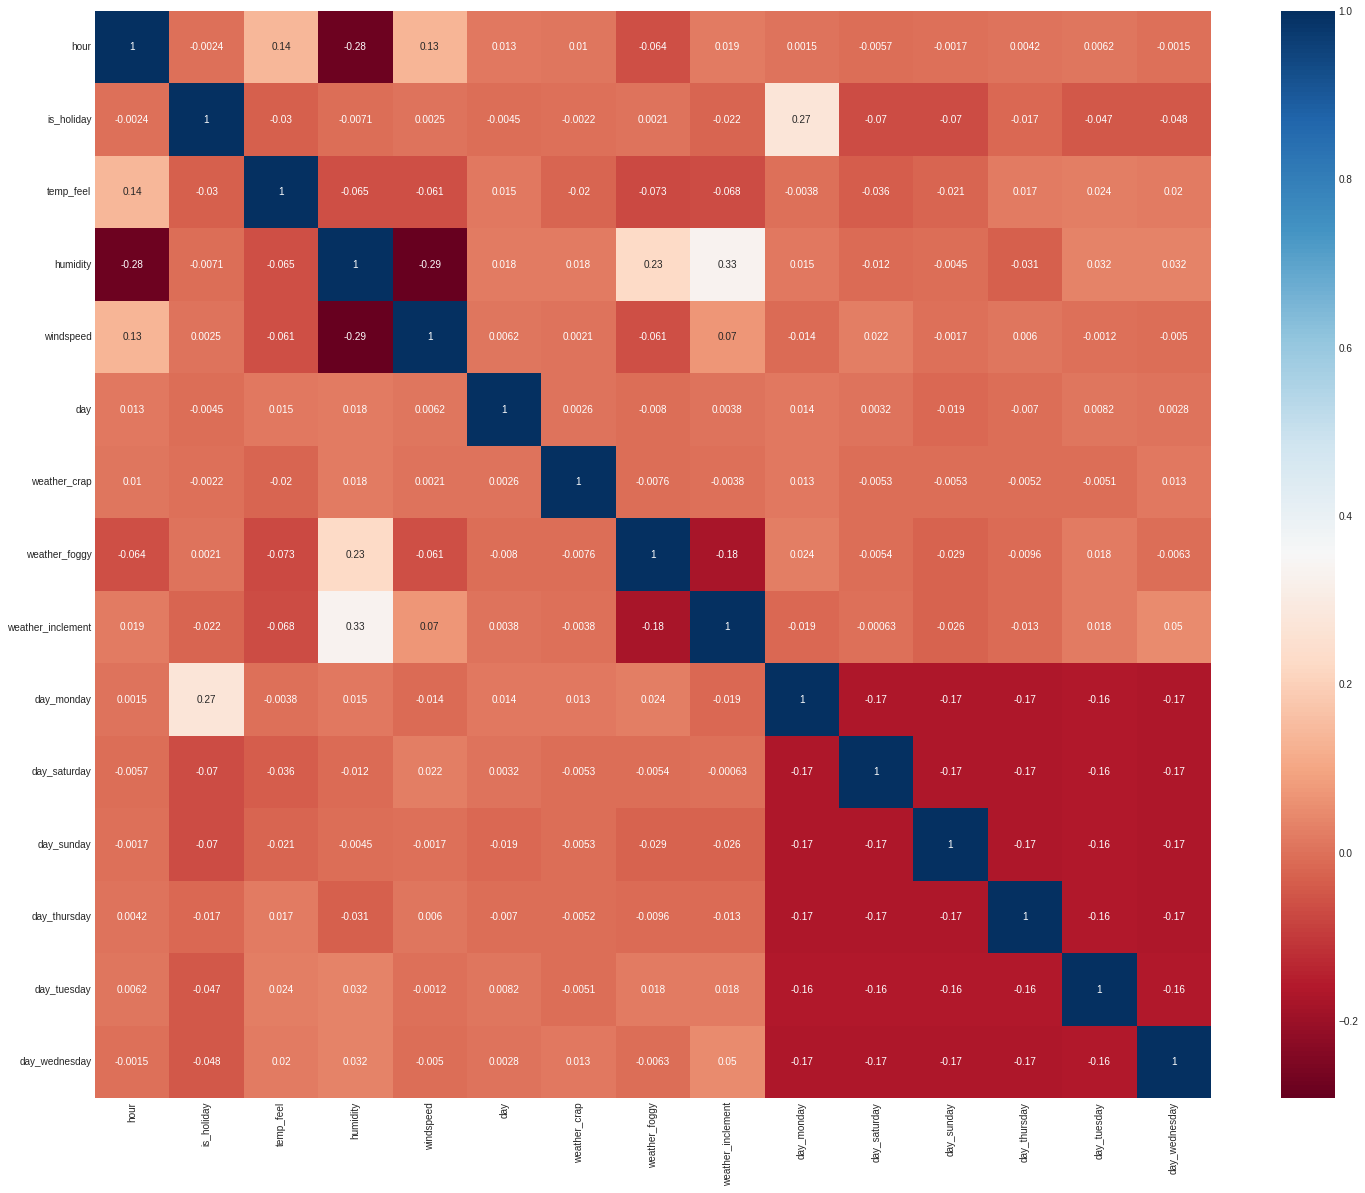

In [107]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sb.heatmap(X_train_vif_4.corr(), annot = True, cmap="RdBu")
plt.show()